<h2><b>빈 공간을 만들어 도형 그리기 (원, 사각형, 직선 등)

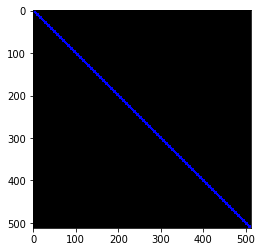

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Draw Function
img=np.zeros((512,512,3),np.uint8) #(512,512)크기의 빈 공간 만들기
cv2.line(img,(0,0),(512,512),(0,0,255),5)

plt.imshow(img)

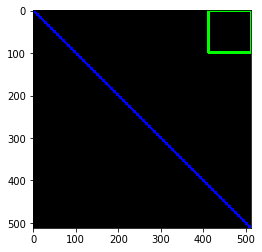

In [17]:
#draw rectangle
cv2.rectangle(img,(512,0),(412,100),(0,255,0),5) #(src,좌측아래,우측위,색,두께)
plt.imshow(img)

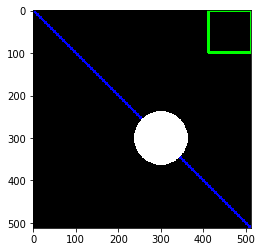

In [18]:
#draw Circle
cv2.circle(img, (300,300),63,(255,255,255),-1) #(src,중심,반지름,색,두께)
plt.imshow(img)

<b><h3>+) #MouseEvent활용해서 도형 그리기

In [34]:
import cv2
import numpy as np

# callback함수
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y), 30,(255,255,0),-1)
        print(x,y)

# 빈 Image 생성
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while(1):
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27: #waitkey(0) -> mouse를 눌러도 반응이 없음
        break

cv2.destroyAllWindows()

232 242
342 319


In [28]:
#누른상태에서 이동하여 rectangle, M을 누르면 circle 그리기
import cv2
import numpy as np 

drawing = False #Mouse가 클릭된 상태 확인용, True면 클릭된 상태
mode = True # True이면 사각형, false면 원
ix,iy = -1,-1


# Mouse Callback함수
def draw_circle(event, x,y, flags, param):
	global ix,iy, drawing, mode #함수 밖에서 선언한 변수는 함수 안에서 global로 설정해야함

	if event == cv2.EVENT_LBUTTONDOWN: #마우스를 누른 상태
		drawing = True 
		ix, iy = x,y
	elif event == cv2.EVENT_MOUSEMOVE: # 마우스 이동
		if drawing == True:            # 마우스를 누른 상태 일경우
			if mode == True:
				cv2.rectangle(img,(ix,iy),(x,y),(255,0,0),-1)
			else:
				cv2.circle(img,(x,y),5,(0,255,0),-1)

	elif event == cv2.EVENT_LBUTTONUP:
		drawing = False;             # 마우스를 때면 상태 변경
		if mode == True:
			cv2.rectangle(img,(ix,iy),(x,y),(255,0,0),-1)
		else:
			cv2.circle(img,(x,y),5,(0,255,0),-1)


img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

while True:
	cv2.imshow('image', img)

	k = cv2.waitKey(1) & 0xFF

	if k == ord('m'):    # 사각형, 원 Mode변경
		mode = not mode
	elif k == 27:        # esc를 누르면 종료
		break

cv2.destroyAllWindows()
